In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib.pyplot import xticks

raw_match_data = pd.read_csv("../data/9-10-25/matches.csv")
participants = pd.read_csv("../data/9-10-25/participants.csv")
players = pd.read_csv("../data/9-10-25/players.csv")
raw_participants = pd.read_csv("../TestCSV/participant_frames_with_rank.csv",
                               dtype={"puuid": str, "matchId": str, "timestamp": int, "currentGold": int, "goldPerSecond": int,
                   "totalGold": int, "championDamage": int, "minionsKilled": int, "participantId": int,
                   "xp": int, "level": int,"player_rank" : str})

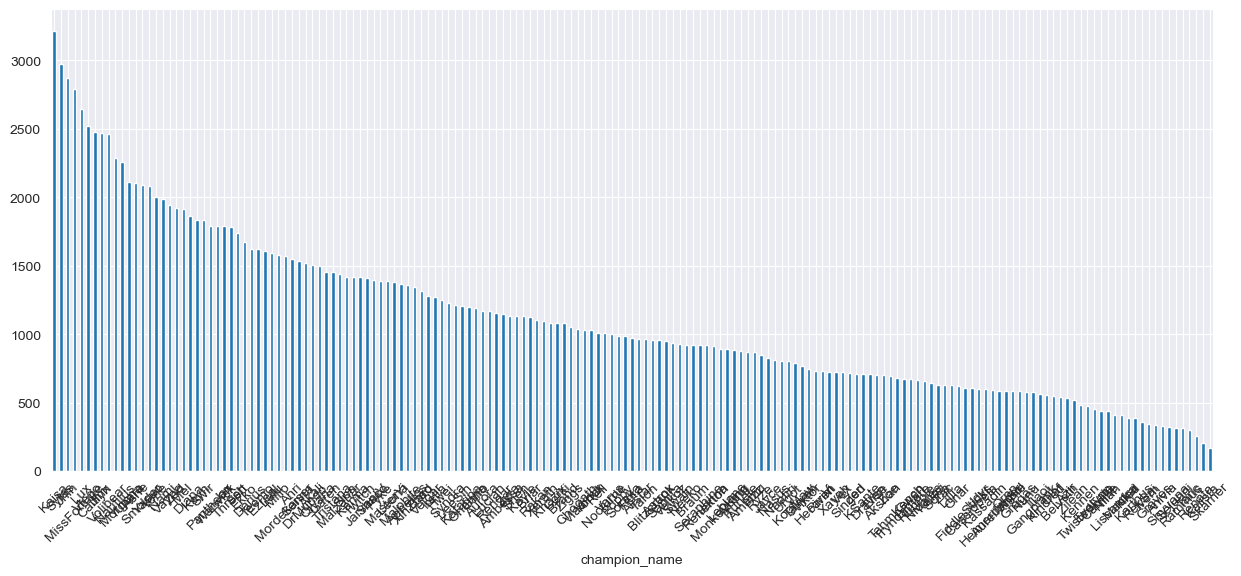

In [3]:
participants["champion_name"].value_counts().plot(kind="bar",figsize=(15,6))
plt.xticks(rotation=45)
plt.show()


In [4]:
raw_participants["tier"] = raw_participants["player_rank"].str.split().str[0]

tier_groups = {
    tier: group.copy()
    for tier, group in raw_participants.groupby("tier")
}

iron_df = tier_groups["IRON"]
bronze_df = tier_groups["BRONZE"]
silver_df = tier_groups["SILVER"]
gold_df = tier_groups["GOLD"]
platinum_df = tier_groups["PLATINUM"]
emerald_df = tier_groups["EMERALD"]
diamond_df = tier_groups["DIAMOND"]
master_df = tier_groups["MASTER"]
grandmaster_df = tier_groups["GRANDMASTER"]
challenger_df = tier_groups["CHALLENGER"]

In [5]:
df = raw_participants.copy()

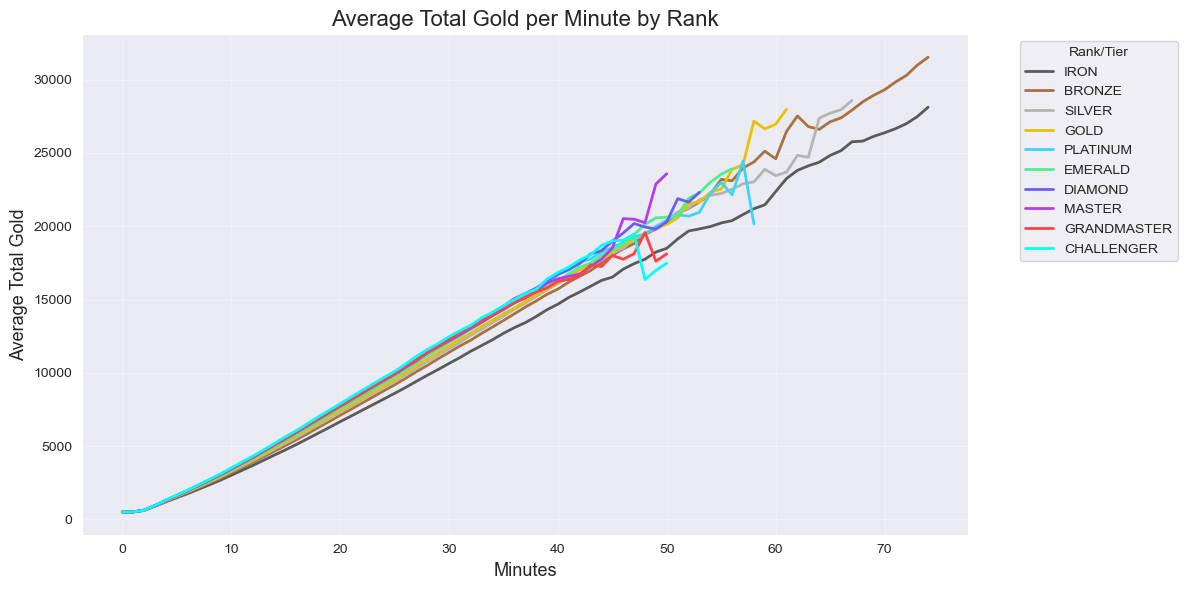

In [6]:
import seaborn as sns
df["minute"] = (df["timestamp"] / 60000).astype(int)

df["tier"] = df["player_rank"].str.split().str[0]

avg_gold_per_min_tier = (
    df.groupby(["tier", "minute"])["totalGold"]
      .mean()
      .reset_index()
)

tier_order = ["IRON", "BRONZE", "SILVER", "GOLD",
              "PLATINUM", "EMERALD", "DIAMOND",
              "MASTER", "GRANDMASTER", "CHALLENGER"]

custom_colors = ["#5A5A5A","#A97142","#B4B4B4","#E6C200","#3FD3F9","#4AF28E","#6B5DF3","#B23CF0","#FF4343","#00FFFF",]

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_gold_per_min_tier,
    x="minute",
    y="totalGold",
    hue="tier",
    hue_order=tier_order,
    linewidth=2,
    palette=custom_colors,
)
plt.title("Average Total Gold per Minute by Rank", fontsize=16)
plt.xlabel("Minutes", fontsize=13)
plt.ylabel("Average Total Gold", fontsize=13)
plt.grid(alpha=0.3)
plt.legend(title="Rank/Tier", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

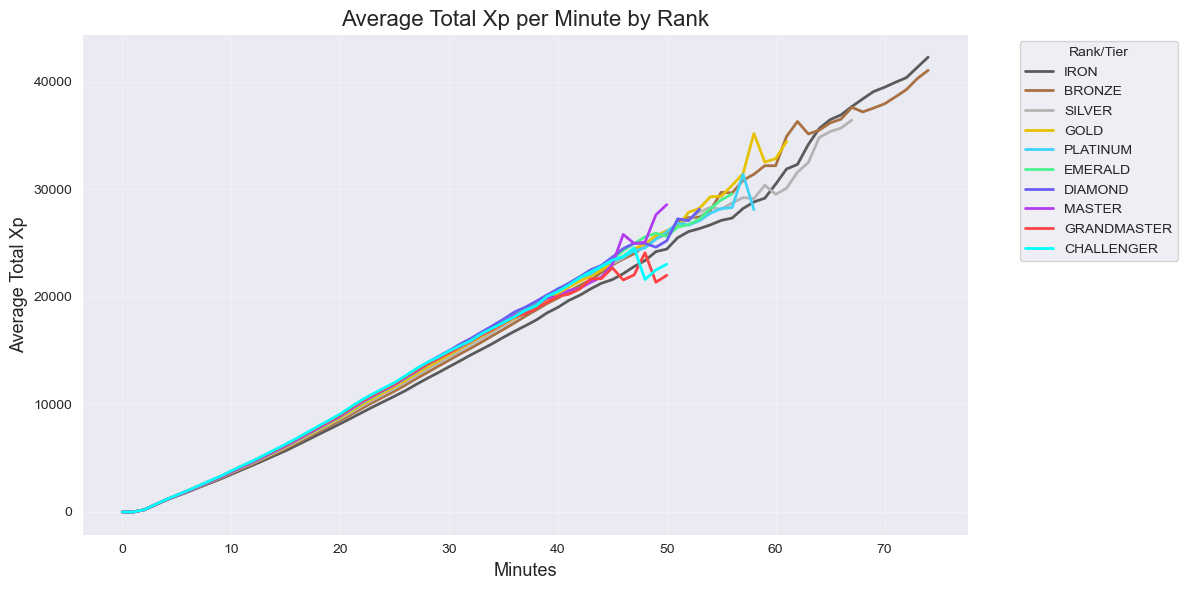

In [7]:
avg_xp_per_min_tier = (
    df.groupby(["tier", "minute"])["xp"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=avg_xp_per_min_tier,
    x="minute",
    y="xp",
    hue="tier",
    hue_order=tier_order,
    linewidth=2,
    palette=custom_colors,
)
plt.title("Average Total Xp per Minute by Rank", fontsize=16)
plt.xlabel("Minutes", fontsize=13)
plt.ylabel("Average Total Xp", fontsize=13)
plt.grid(alpha=0.3)
plt.legend(title="Rank/Tier", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()